# K-means Clustering algorithm on iris dataset
k-means clustering algorithm is applied to the features (sepal length and sepal width) of the Iris dataset. The n_clusters parameter is set to 3 because there are three species of iris flowers in the dataset. The cluster labels are assigned to each data point, and then a scatter plot is created to visualize the clusters

1. Iris-setosa
2. Iris-versicolor
3. Iris-virginica

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")
%matplotlib inline
from sklearn.metrics import accuracy_score, classification_report



In [12]:
iris_data = pd.read_csv('iris.csv')
iris_data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
iris_data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [15]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [30]:
iris_data['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Text(0.5, 1.0, 'Classes of iris species')

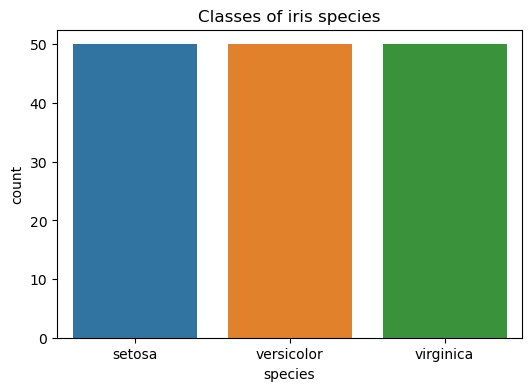

In [34]:
plt.figure(figsize=(6,4))
sns.countplot(data=iris_data, x='species')
plt.title('Classes of iris species')

<Axes: xlabel='sepal_length', ylabel='petal_length'>

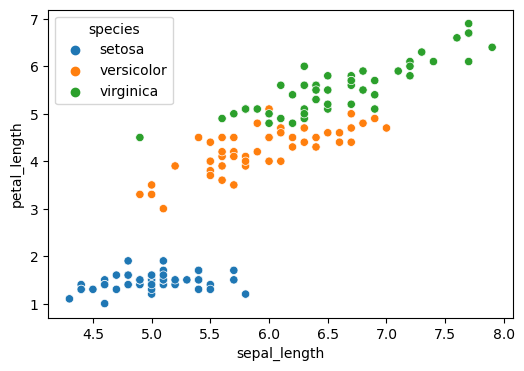

In [32]:
plt.figure(figsize=[6,4])
sns.scatterplot(data=iris_data,x='sepal_length',y='petal_length',hue="species")

<Axes: xlabel='sepal_width', ylabel='petal_width'>

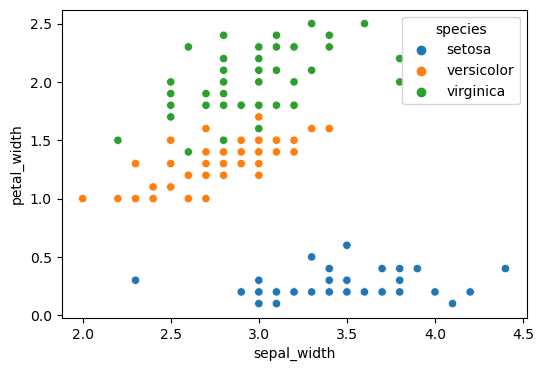

In [33]:
plt.figure(figsize=[6,4])
sns.scatterplot(data=iris_data,x='sepal_width',y='petal_width',hue="species")

In [37]:
X=iris_data.drop("species",axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [38]:
from sklearn.cluster import KMeans

In [39]:
model=KMeans(n_clusters=5,random_state=42)
model

KMeans(n_clusters=5, random_state=42)

In [40]:
model.fit(X)

KMeans(n_clusters=5, random_state=42)

In [41]:
model.cluster_centers_

array([[7.475     , 3.125     , 6.3       , 2.05      ],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.508     , 2.6       , 3.908     , 1.204     ],
       [6.20769231, 2.85384615, 4.74615385, 1.56410256],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ]])

In [42]:
x_center=model.cluster_centers_[:,0]
x_center

array([7.475     , 5.006     , 5.508     , 6.20769231, 6.52916667])

In [43]:
y_center=model.cluster_centers_[:,2]
y_center

array([6.3       , 1.464     , 3.908     , 4.74615385, 5.50833333])

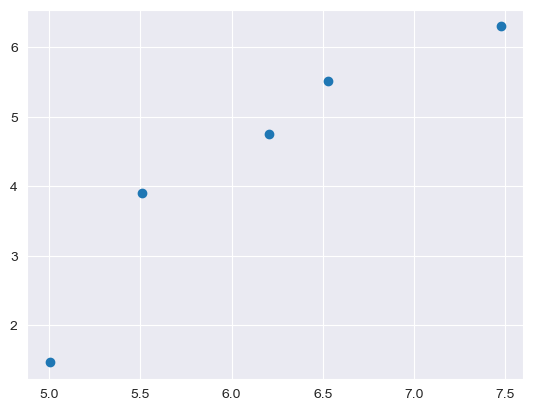

In [44]:
plt.scatter(x_center,y_center)

In [45]:
preds=model.predict(X)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 4, 3, 0, 4, 4, 0, 2, 0, 4, 0,
       4, 4, 4, 3, 4, 4, 4, 0, 0, 3, 4, 3, 0, 3, 4, 0, 3, 3, 4, 0, 0, 0,
       4, 3, 3, 0, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3])

In [46]:
model.inertia_

46.53558205128205

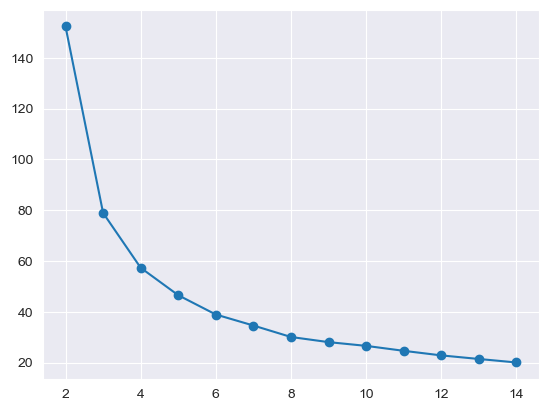

In [47]:
options=range(2,15)
inertia=[]
for n in options:
    model=KMeans(n, random_state=42).fit(X)
    inertia.append(model.inertia_)
    
plt.plot(options,inertia,'-o')